In [ ]:
# Importação de bibliotecas para análise de dados e aprendizado de máquina

# Módulos para particionamento de dados e validação cruzada
from sklearn.model_selection import train_test_split  # Divisão dos dados em conjunto de treino e teste

# Módulos para avaliação de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusão e sua exibição gráfica

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt  # Biblioteca principal para criação de gráficos
import pandas as pd  # Manipulação e análise de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays
import seaborn as sns  # Biblioteca para visualizações estatísticas avançadas

# Módulo para interação com o sistema operacional
import joblib  # Serialização de objetos Python para armazenamento em disco
# Importa a classe para criar o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Biblioteca para visualização de gráficos a partir de arquivos DOT
import graphviz



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

#
0 - Não diabetico
1 - Diabetico
2 - Pre Diabetico

In [4]:
df = pd.read_csv("data.csv")
print(df.head())

   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
3       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0
4       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0


In [5]:
print(df.isnull().sum())

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64



 ANÁLISE PARA A VARIÁVEL: 'AGE'
Média Geral de 'AGE': 49.5227
Coeficiente de Determinação (R²): 0.3163
-> Conclusão: 31.63% da variação em 'AGE' é explicada pelo diagnóstico.


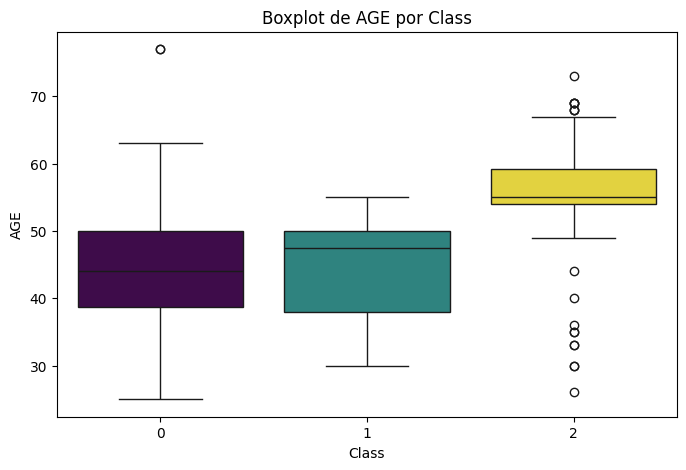


 ANÁLISE PARA A VARIÁVEL: 'UREA'
Média Geral de 'Urea': 5.6715
Coeficiente de Determinação (R²): 0.0653
-> Conclusão: 6.53% da variação em 'Urea' é explicada pelo diagnóstico.


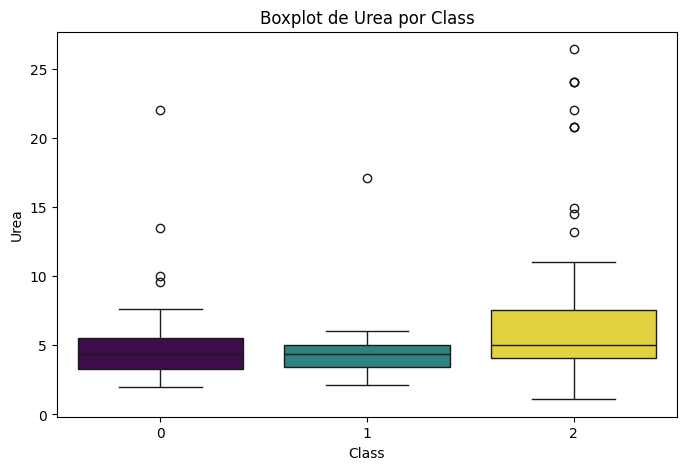


 ANÁLISE PARA A VARIÁVEL: 'CR'
Média Geral de 'Cr': 85.8068
Coeficiente de Determinação (R²): 0.0472
-> Conclusão: 4.72% da variação em 'Cr' é explicada pelo diagnóstico.


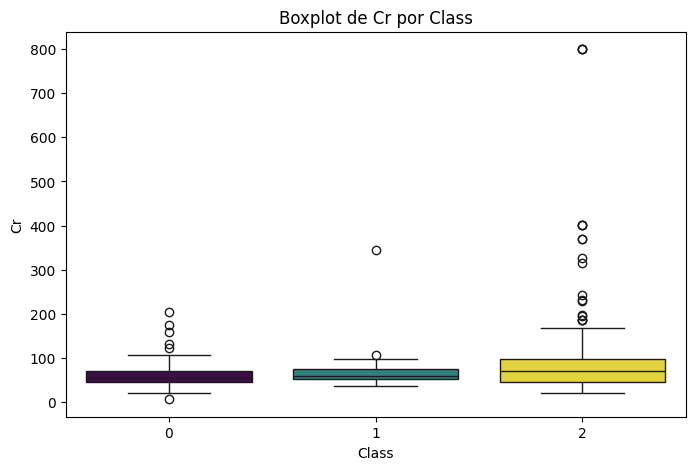


 ANÁLISE PARA A VARIÁVEL: 'HBA1C'
Média Geral de 'HbA1c': 6.8627
Coeficiente de Determinação (R²): 0.6056
-> Conclusão: 60.56% da variação em 'HbA1c' é explicada pelo diagnóstico.


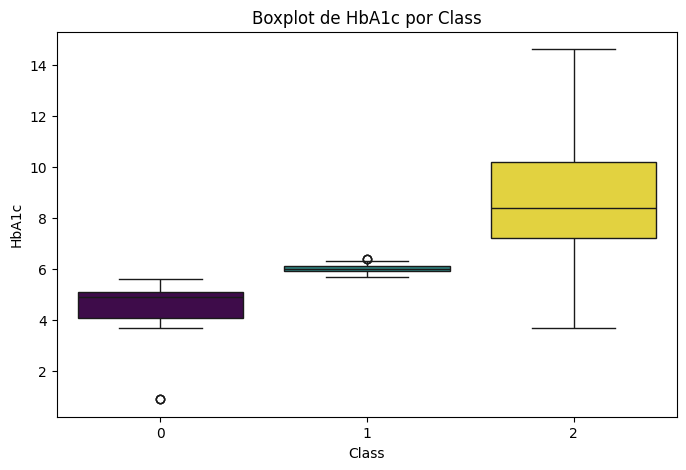


 ANÁLISE PARA A VARIÁVEL: 'CHOL'
Média Geral de 'Chol': 4.5944
Coeficiente de Determinação (R²): 0.0704
-> Conclusão: 7.04% da variação em 'Chol' é explicada pelo diagnóstico.


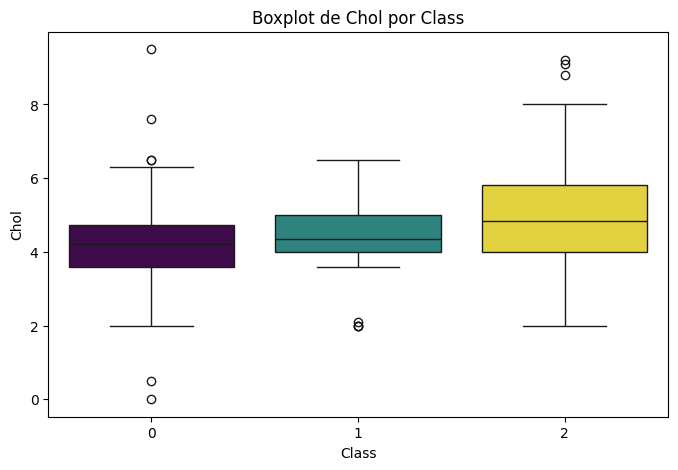


 ANÁLISE PARA A VARIÁVEL: 'TG'
Média Geral de 'TG': 2.1519
Coeficiente de Determinação (R²): 0.0982
-> Conclusão: 9.82% da variação em 'TG' é explicada pelo diagnóstico.


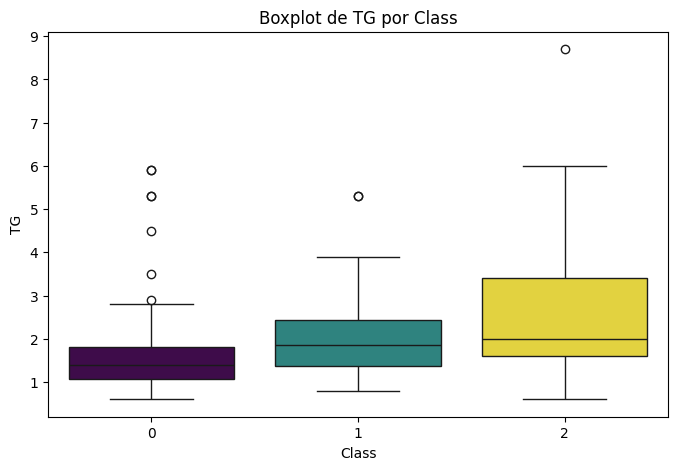


 ANÁLISE PARA A VARIÁVEL: 'HDL'
Média Geral de 'HDL': 1.1829
Coeficiente de Determinação (R²): 0.0037
-> Conclusão: 0.37% da variação em 'HDL' é explicada pelo diagnóstico.


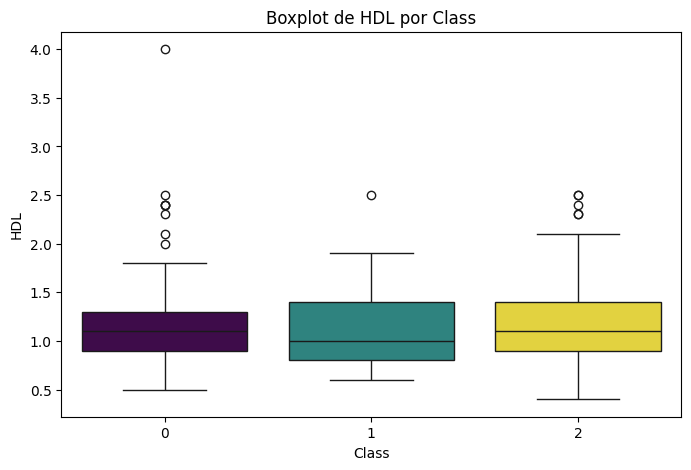


 ANÁLISE PARA A VARIÁVEL: 'LDL'
Média Geral de 'LDL': 2.5309
Coeficiente de Determinação (R²): 0.0073
-> Conclusão: 0.73% da variação em 'LDL' é explicada pelo diagnóstico.


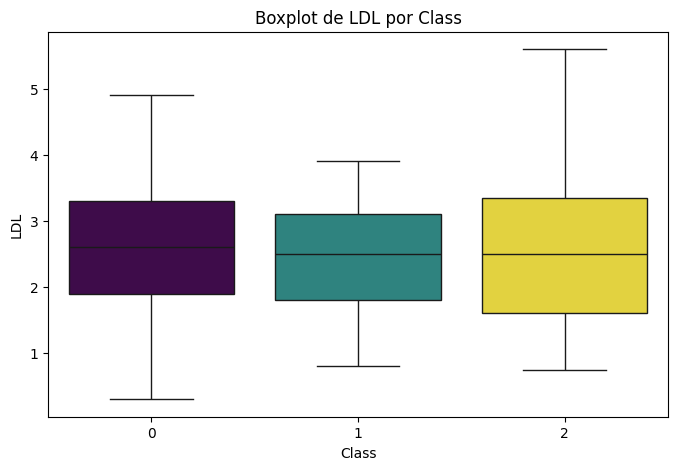


 ANÁLISE PARA A VARIÁVEL: 'VLDL'
Média Geral de 'VLDL': 1.4792
Coeficiente de Determinação (R²): 0.0277
-> Conclusão: 2.77% da variação em 'VLDL' é explicada pelo diagnóstico.


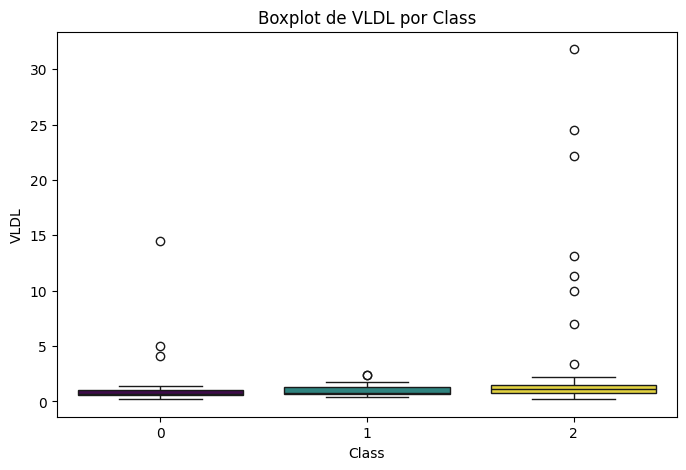


 ANÁLISE PARA A VARIÁVEL: 'BMI'
Média Geral de 'BMI': 26.6269
Coeficiente de Determinação (R²): 0.5935
-> Conclusão: 59.35% da variação em 'BMI' é explicada pelo diagnóstico.


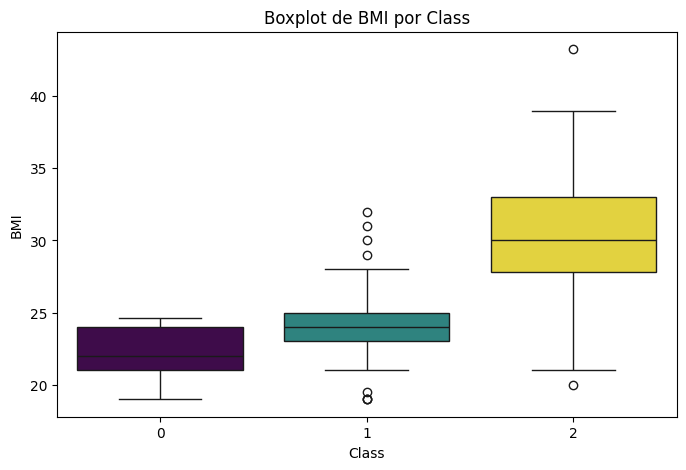


 RESUMO FINAL - Poder de Associação (R²)


,Variável Quantitativa,R²
0,HbA1c,0.605638
1,BMI,0.593540
2,AGE,0.316280
3,TG,0.098247
4,Chol,0.070389
5,Urea,0.065289
6,Cr,0.047211
7,VLDL,0.027656
8,LDL,0.007282
9,HDL,0.003724


In [6]:
colunas_quantitativas = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol','TG','HDL','LDL','VLDL','BMI']
resultados_finais_r2 = []

# --------------------------------------------------------------------
# 2. LOOP: Iterar sobre cada variável quantitativa
# --------------------------------------------------------------------
for col in colunas_quantitativas:
    print("\n" + "="*60)
    print(f" ANÁLISE PARA A VARIÁVEL: '{col.upper()}'")
    print("="*60)

    # Passo 1: Calcular a Média Geral
    media_geral = df[col].mean()

    # Passo 2: Calcular a Soma dos Quadrados Total (SQT)
    SQT = ((df[col] - media_geral) ** 2).sum()

    # Passo 3: Calcular a Soma dos Quadrados Explicada (SQE)
    media_por_grupo = df.groupby("Class")[col].mean()
    media_grupo_mapeada = df["Class"].map(media_por_grupo)
    SQE = ((media_grupo_mapeada - media_geral) ** 2).sum()

    # Passo 4: Calcular o R²
    # Tratamento para evitar divisão por zero, caso SQT seja 0
    if SQT == 0:
        R2 = 0
    else:
        R2 = SQE / SQT

    # Armazenar o resultado
    resultados_finais_r2.append([col, R2])

    # Exibir resultados detalhados para a variável atual
    print(f"Média Geral de '{col}': {media_geral:.4f}")
    print(f"Coeficiente de Determinação (R²): {R2:.4f}")
    print(f"-> Conclusão: {R2:.2%} da variação em '{col}' é explicada pelo diagnóstico.")

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Class', y=col, data=df, palette='viridis', hue='Class', legend=False)
    plt.title(f'Boxplot de {col} por Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

# --------------------------------------------------------------------
# 3. EXIBIR TABELA DE RESUMO
# --------------------------------------------------------------------
print("\n" + "="*60)
print(" RESUMO FINAL - Poder de Associação (R²)")
print("="*60)
df_resumo_r2 = pd.DataFrame(resultados_finais_r2, columns=['Variável Quantitativa', 'R²'])
df_resumo_r2 = df_resumo_r2.sort_values(by='R²', ascending=False).reset_index(drop=True)
display(df_resumo_r2)


 ANÁLISE DETALHADA DA VARIÁVEL: 'GENDER'
 -> Tabela de Frequência:
Gender
1    144
0    120
Name: count, dtype: int64


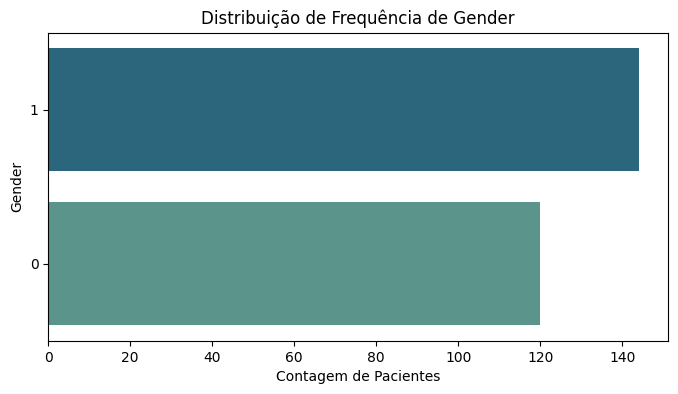

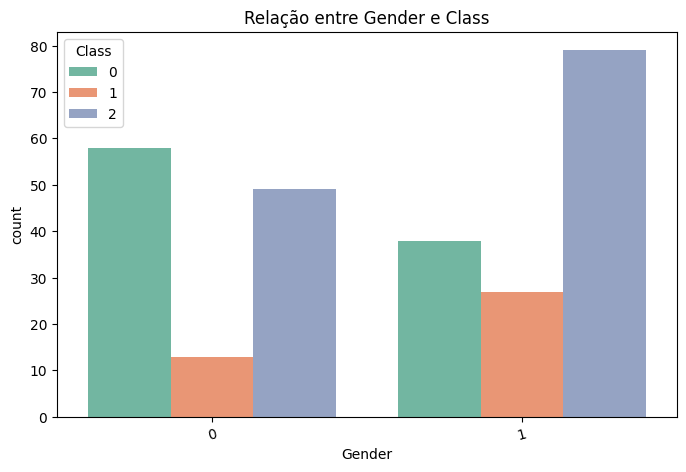

 FORÇA DA ASSOCIAÇÃO (Teste Qui-Quadrado):
  - Estatística χ²: 14.0321
  - P-Valor: 0.0009
  -> Conclusão: Associação ESTATISTICAMENTE SIGNIFICATIVA.

 VISÃO GERAL: RESULTADOS DO TESTE QUI-QUADRADO


,Variável,Estatística χ²,P-Valor
0,Gender,14.032066,0.000897


In [7]:
colunas_qualitativas = ['Gender']
resultados_finais_chi2 = []

# --- Análise Individual de Cada Variável Qualitativa ---
for col in colunas_qualitativas:
    print("\n" + "="*60)
    print(f" ANÁLISE DETALHADA DA VARIÁVEL: '{col.upper()}'")
    print("="*60)

    # 1. Análise Univariada (Frequência e Gráfico de Barras)
    print(" -> Tabela de Frequência:")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, palette='crest', order=df[col].value_counts().index, hue=col, legend=False)
    plt.title(f'Distribuição de Frequência de {col}')
    plt.xlabel('Contagem de Pacientes')
    plt.ylabel(col)
    plt.show()

    # 2. Análise Bivariada (Relação com o Alvo 'DoencaCardiaca')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Class', data=df, palette='Set2')
    plt.title(f'Relação entre {col} e Class')
    plt.xticks(rotation=15)
    plt.show()

    # 3. Teste Qui-Quadrado para medir a associação
    tabela_contingencia = pd.crosstab(df[col], df['Class'])
    chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)
    print(f" FORÇA DA ASSOCIAÇÃO (Teste Qui-Quadrado):")
    print(f"  - Estatística χ²: {chi2:.4f}")
    print(f"  - P-Valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print("  -> Conclusão: Associação ESTATISTICAMENTE SIGNIFICATIVA.")
    else:
        print("  -> Conclusão: NÃO há associação estatisticamente significativa.")

    resultados_finais_chi2.append([col, chi2, p_valor])

# --- Tabela de Resumo dos Resultados Qui-Quadrado ---
print("\n" + "="*60)
print(" VISÃO GERAL: RESULTADOS DO TESTE QUI-QUADRADO")
print("="*60)
df_resumo_chi2 = pd.DataFrame(resultados_finais_chi2, columns=['Variável', 'Estatística χ²', 'P-Valor']).sort_values(by='P-Valor')
display(df_resumo_chi2)

In [8]:
def getModel():
    """
    Retorna um modelo de aprendizado de máquina para classificação.

    O usuário pode descomentar a linha do modelo desejado para utilizá-lo.

    Retorna:
    - Um classificador escolhido entre RandomForest, GaussianNB, Logistic Regression,
      KNN, XGBoost ou SGDClassifier.
    """

    # Arvore de Decisão
    return DecisionTreeClassifier(max_depth=2)

    # Retorna um classificador Naive Bayes Gaussiano (padrão)
    #return GaussianNB()

    # Opções alternativas de modelos (descomente para utilizá-los):

    # Retorna um Random Forest Classifier com processamento paralelo
    #return RandomForestClassifier(n_jobs=12)

    # Retorna uma Regressão Logística com solver otimizado para grandes datasets
    # return LogisticRegression(n_jobs=20, solver='sag', multi_class='ovr')

    # Retorna um classificador KNN com 3 vizinhos e processamento paralelo
    # return KNeighborsClassifier(n_neighbors=3, n_jobs=20)

    # Retorna um classificador baseado em XGBoost
    # return XGBClassifier()

    # Retorna um SGDClassifier com early stopping e validação de 5% dos dados
    # return SGDClassifier(n_jobs=20, early_stopping=True, validation_fraction=0.05)

# Pré Processamento

In [9]:
# Defina as colunas para cada tipo de transformação
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol','TG','HDL','LDL','VLDL','BMI']
categorical_cols = ['Gender']

# 2. One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

print("--- DataFrame após One-Hot Encoding ---")
print(df_encoded)
print("\n")

# # 3. Z-score nas variáveis numéricas
# scaler = StandardScaler()
# df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# print("--- DataFrame após Z-score Scaling nas colunas numéricas ---")
# print(df_encoded)
# print("\n")

# # 4. PCA (Análise de Componentes Principais)
# # A variável 'n_components=0.98' garante que a PCA retém 98% da variância.
# pca = PCA(n_components=0.98)
# df_pca = pca.fit_transform(df_encoded)

# pca_filename = 'pca_model.pkl'
# joblib.dump(pca, pca_filename)


# print("--- DataFrame após PCA (98% da variância) ---")
# print("Dimensão Original:", df_encoded.shape)
# print("Dimensão PCA:", df_pca.shape)
# print("Número de componentes selecionados:", pca.n_components_)
# print("Variância Explicada por cada componente:", pca.explained_variance_ratio_)
# print("\n")

# # 5. Exportar o Scaler (Modelo de Z-score)
# # Salva o modelo treinado para que você possa usá-lo em novos dados
# scaler_filename = 'z_score_scaler.pkl'
# joblib.dump(scaler, scaler_filename)

# print(f"Scaler salvo com sucesso no arquivo '{scaler_filename}'.")
# print("\nPara carregar o scaler depois, use: `loaded_scaler = joblib.load('z_score_scaler.pkl')`")


--- DataFrame após One-Hot Encoding ---
     AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class  Gender_0  \
0     50   4.7   46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0      True   
1     26   4.5   62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0     False   
2     33   7.1   46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0     False   
3     45   2.3   24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0      True   
4     50   2.0   50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0      True   
..   ...   ...  ...    ...   ...  ...  ...  ...   ...   ...    ...       ...   
259   61  24.0  401    7.0   4.3  2.9  0.4  2.7   1.3  30.0      2      True   
260   61  24.0  401    7.0   4.3  2.9  0.4  2.7   1.3  36.6      2      True   
261   60  20.8  800    9.0   2.3  1.1  0.9  0.9   0.5  33.0      2     False   
262   56  20.8  800    9.0   4.6  2.0  1.2  2.5   0.9  35.0      2     False   
263   58  20.8  800    9.1   6.6  2.9  1.1  4.3   1.3  33.0      2     False   


# Modelo

In [10]:
X = df_encoded.drop(columns=['Class'])
y = df_encoded['Class']

In [11]:
scores = list()
highest_score = 0
best_model = None
for i in range(30):
    # Divisão dos dados em conjunto de treino e teste
    # - df_features.values -> Matriz de características extraídas das imagens (X)
    # - target -> Rótulos das classes associadas a cada imagem (y)
    # - test_size=percentege_test_size -> Define a proporção dos dados usados para teste (ex: 20% se percentege_test_size=0.2)
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2)

    # Obtém o modelo de aprendizado de máquina escolhido e realiza o treinamento
    # - getModel() -> Função que retorna um classificador, como GaussianNB, RandomForest, KNN, etc.
    # - fit(X_treino, y_treino) -> Treina o modelo nos dados de treino
    model = getModel().fit(X_treino, y_treino)

    # Avaliação do modelo no conjunto de teste
    # - score() calcula a acurácia (proporção de previsões corretas no conjunto de teste)
    score = model.score(X_teste, y_teste)

    # Exibe a acurácia do modelo
    score

    scores.append(score)
    if score > highest_score:
        highest_score = score
        best_model = model
    

print(f"Acurácia média do modelo: {np.mean(scores):.2%}")
print(f"Acurácia mínima do modelo: {np.min(scores):.2%}")
print(f"Acurácia máxima do modelo: {np.max(scores):.2%}")
print(f"Desvio padrão da Acurácia padrão do modelo: {np.std(scores):.2%}")
print(f"A melhor acurácia obtida foi: {highest_score:.2%}")
# Salva o modelo treinado em um arquivo
model_filename = 'best_model.pkl'
joblib.dump(best_model, model_filename)

Acurácia média do modelo: 96.98%
Acurácia mínima do modelo: 90.57%
Acurácia máxima do modelo: 100.00%
Desvio padrão da Acurácia padrão do modelo: 2.32%
A melhor acurácia obtida foi: 100.00%


['best_model.pkl']

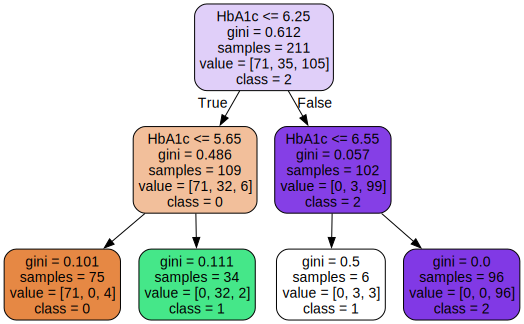

In [12]:
dot_data = export_graphviz(
    best_model,
    out_file=None,
    feature_names=df_encoded.columns.drop('Class'),
    class_names=df_encoded['Class'].unique().astype(str),
    rounded=True,
    filled=True
)

# Cria um objeto Graphviz a partir do DOT gerado e exibe a árvore no notebook
graph = graphviz.Source(dot_data)
graph